In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
# from mpl_toolkits.basemap import Basemap
from scipy.io import loadmat
from cmocean import cm
import warnings
from cartopy import crs, feature
#import cartopy.crs as ccrs

from salishsea_tools import visualisations as vis
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from salishsea_tools import viz_tools, places
import netCDF4 as nc
import pickle
#import LambertConformalTicks as lct

%matplotlib inline
plt.rcParams['font.size'] = 11
warnings.simplefilter('ignore')

In [2]:
#open bathymetry grid
grid = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc', mask_and_scale=False)
bathy = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
meshmask = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

BR3_DIC_winter = pickle.load(open('../pkls/BR3_DIC_winter_mean.pkl', 'rb'))  
BR3_DIC_summer = pickle.load(open('../pkls/BR3_DIC_summer_mean.pkl', 'rb'))
BR3_DIC_fullyear_mean = pickle.load(open('../pkls/BR3_DIC_fullyear_mean.pkl', 'rb'))
BR3_sal_summer = pickle.load(open('../pkls/BR3_sal_summer_mean.pkl', 'rb')) 
#BR3_DIC_fullyear_mean

In [3]:
flag ='../pkls/BR3_flagellates_means_inletsIN.pkl'
diat ='../pkls/BR3_diatoms_means_inletsIN.pkl'
cili ='../pkls/BR3_ciliates_means_inletsIN.pkl'
csd = '../pkls/cellsize_alg2.pkl'

flag_mas = pickle.load(open(flag, 'rb'))  
diat_mas = pickle.load(open(diat, 'rb'))
cili_mas = pickle.load(open(cili, 'rb'))
csize = pickle.load(open(csd, 'rb'))

mmask = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = (mmask['e3t_1d'][:])

mask_broad = np.zeros([40,365])

for i in range(0,365):
    mask_broad[:,i] = depths


flag_mas_mm_m2 = np.nansum((mask_broad*flag_mas),axis = 0)
diat_mas_mm_m2 = np.nansum((mask_broad*diat_mas),axis = 0)
cili_mas_mm_m2 = np.nansum((mask_broad*cili_mas),axis = 0)

In [4]:
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
bath = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
depth = mesh['gdept_1d'][:]
days_in = np.arange(1,366,1)
depths = mesh['gdept_1d'][:]
zdepth = depths[0]   
#make a long 3-year dataset to be able to compare spinup progress for BR run

In [5]:
BR3_var = pickle.load(open('../pkls/BR3_DIC_means_inletsIN.pkl' , 'rb')) 

BR3_var_jdf = pickle.load(open('../pkls/BR3_DIC_means_jdf_BOX.pkl','rb'))
BR3_var_cs = pickle.load(open('../pkls/BR3_DIC_means_cs_BOX.pkl','rb'))
BR3_var_ns = pickle.load(open('../pkls/BR3_DIC_means_ns_BOX.pkl','rb'))
BR3_var_haro = pickle.load(open('../pkls/BR3_DIC_means_haro_BOX.pkl','rb'))

BR3_var_jdf2 = pickle.load(open('../pkls/BR3_DIC_means_jdf2_BOX.pkl','rb'))
BR3_var_cs2 = pickle.load(open('../pkls/BR3_DIC_means_cs2_BOX.pkl','rb'))
BR3_var_ns2 = pickle.load(open('../pkls/BR3_DIC_means_ns2_BOX.pkl','rb'))
BR3_var_haro2 = pickle.load(open('../pkls/BR3_DIC_means_haro2_BOX.pkl','rb'))

BR3_var_jdf3 = pickle.load(open('../pkls/BR3_DIC_means_jdf3_BOX.pkl','rb'))
BR3_var_cs3 = pickle.load(open('../pkls/BR3_DIC_means_cs3_BOX.pkl','rb'))
BR3_var_ns3 = pickle.load(open('../pkls/BR3_DIC_means_ns3_BOX.pkl','rb'))
BR3_var_haro3 = pickle.load(open('../pkls/BR3_DIC_means_haro3_BOX.pkl','rb'))

BR3_dp = np.nanmean(BR3_var, axis =1)

BR3_jdf_dp = np.nanmean(BR3_var_jdf, axis =1)
BR3_cs_dp = np.nanmean(BR3_var_cs, axis =1)
BR3_ns_dp = np.nanmean(BR3_var_ns, axis =1)
BR3_haro_dp = np.nanmean(BR3_var_haro, axis =1)

BR3_jdf2_dp = np.nanmean(BR3_var_jdf2, axis =1)
BR3_cs2_dp = np.nanmean(BR3_var_cs2, axis =1)
BR3_ns2_dp = np.nanmean(BR3_var_ns2, axis =1)
BR3_haro2_dp = np.nanmean(BR3_var_haro2, axis =1)

BR3_jdf3_dp = np.nanmean(BR3_var_jdf3, axis =1)
BR3_cs3_dp = np.nanmean(BR3_var_cs3, axis =1)
BR3_ns3_dp = np.nanmean(BR3_var_ns3, axis =1)
BR3_haro3_dp = np.nanmean(BR3_var_haro3, axis =1)

In [6]:
PI9_var = pickle.load(open('../pkls/PI9_DIC_means_inletsIN.pkl' , 'rb')) 

PI9_var_jdf = pickle.load(open('../pkls/PI9_DIC_means_jdf_BOX.pkl','rb'))
PI9_var_cs = pickle.load(open('../pkls/PI9_DIC_means_cs_BOX.pkl','rb'))
PI9_var_ns = pickle.load(open('../pkls/PI9_DIC_means_ns_BOX.pkl','rb'))
PI9_var_haro = pickle.load(open('../pkls/PI9_DIC_means_haro_BOX.pkl','rb'))

PI9_var_jdf2 = pickle.load(open('../pkls/PI9_DIC_means_jdf2_BOX.pkl','rb'))
PI9_var_cs2 = pickle.load(open('../pkls/PI9_DIC_means_cs2_BOX.pkl','rb'))
PI9_var_ns2 = pickle.load(open('../pkls/PI9_DIC_means_ns2_BOX.pkl','rb'))
PI9_var_haro2 = pickle.load(open('../pkls/PI9_DIC_means_haro2_BOX.pkl','rb'))

PI9_var_jdf3 = pickle.load(open('../pkls/PI9_DIC_means_jdf3_BOX.pkl','rb'))
PI9_var_cs3 = pickle.load(open('../pkls/PI9_DIC_means_cs3_BOX.pkl','rb'))
PI9_var_ns3 = pickle.load(open('../pkls/PI9_DIC_means_ns3_BOX.pkl','rb'))
PI9_var_haro3 = pickle.load(open('../pkls/PI9_DIC_means_haro3_BOX.pkl','rb'))

PI9_var_ps = pickle.load(open('../pkls/PI9_DIC_means_ps_BOX.pkl','rb'))
PI9_var_ps2 = pickle.load(open('../pkls/PI9_DIC_means_ps2_BOX.pkl','rb'))
PI9_ps_dp = np.nanmean(PI9_var_ps, axis =1)
PI9_ps2_dp = np.nanmean(PI9_var_ps2, axis =1)
BR3_var_ps = pickle.load(open('../pkls/BR3_DIC_means_ps_BOX.pkl','rb'))
BR3_var_ps2 = pickle.load(open('../pkls/BR3_DIC_means_ps2_BOX.pkl','rb'))
BR3_ps_dp = np.nanmean(BR3_var_ps, axis =1)
BR3_ps2_dp = np.nanmean(BR3_var_ps2, axis =1)

PI9_dp = np.nanmean(PI9_var, axis =1)

PI9_jdf_dp = np.nanmean(PI9_var_jdf, axis =1)
PI9_cs_dp = np.nanmean(PI9_var_cs, axis =1)
PI9_ns_dp = np.nanmean(PI9_var_ns, axis =1)
PI9_haro_dp = np.nanmean(PI9_var_haro, axis =1)

PI9_jdf2_dp = np.nanmean(PI9_var_jdf2, axis =1)
PI9_cs2_dp = np.nanmean(PI9_var_cs2, axis =1)
PI9_ns2_dp = np.nanmean(PI9_var_ns2, axis =1)
PI9_haro2_dp = np.nanmean(PI9_var_haro2, axis =1)

PI9_jdf3_dp = np.nanmean(PI9_var_jdf3, axis =1)
PI9_cs3_dp = np.nanmean(PI9_var_cs3, axis =1)
PI9_ns3_dp = np.nanmean(PI9_var_ns3, axis =1)
PI9_haro3_dp = np.nanmean(PI9_var_haro3, axis =1)

In [7]:
PI6_var = pickle.load(open('../pkls/PI6_DIC_means_inletsIN.pkl' , 'rb')) 

PI6_var_jdf = pickle.load(open('../pkls/PI6_DIC_means_jdf_BOX.pkl','rb'))
PI6_var_cs = pickle.load(open('../pkls/PI6_DIC_means_cs_BOX.pkl','rb'))
PI6_var_ns = pickle.load(open('../pkls/PI6_DIC_means_ns_BOX.pkl','rb'))
PI6_var_haro = pickle.load(open('../pkls/PI6_DIC_means_haro_BOX.pkl','rb'))

PI6_var_jdf2 = pickle.load(open('../pkls/PI6_DIC_means_jdf2_BOX.pkl','rb'))
PI6_var_cs2 = pickle.load(open('../pkls/PI6_DIC_means_cs2_BOX.pkl','rb'))
PI6_var_ns2 = pickle.load(open('../pkls/PI6_DIC_means_ns2_BOX.pkl','rb'))
PI6_var_haro2 = pickle.load(open('../pkls/PI6_DIC_means_haro2_BOX.pkl','rb'))

PI6_var_jdf3 = pickle.load(open('../pkls/PI6_DIC_means_jdf3_BOX.pkl','rb'))
PI6_var_cs3 = pickle.load(open('../pkls/PI6_DIC_means_cs3_BOX.pkl','rb'))
PI6_var_ns3 = pickle.load(open('../pkls/PI6_DIC_means_ns3_BOX.pkl','rb'))
PI6_var_haro3 = pickle.load(open('../pkls/PI6_DIC_means_haro3_BOX.pkl','rb'))

PI6_dp = np.nanmean(PI6_var, axis =1)

PI6_jdf_dp = np.nanmean(PI6_var_jdf, axis =1)
PI6_cs_dp = np.nanmean(PI6_var_cs, axis =1)
PI6_ns_dp = np.nanmean(PI6_var_ns, axis =1)
PI6_haro_dp = np.nanmean(PI6_var_haro, axis =1)

PI6_jdf2_dp = np.nanmean(PI6_var_jdf2, axis =1)
PI6_cs2_dp = np.nanmean(PI6_var_cs2, axis =1)
PI6_ns2_dp = np.nanmean(PI6_var_ns2, axis =1)
PI6_haro2_dp = np.nanmean(PI6_var_haro2, axis =1)

PI6_jdf3_dp = np.nanmean(PI6_var_jdf3, axis =1)
PI6_cs3_dp = np.nanmean(PI6_var_cs3, axis =1)
PI6_ns3_dp = np.nanmean(PI6_var_ns3, axis =1)
PI6_haro3_dp = np.nanmean(PI6_var_haro3, axis =1)

In [8]:
PI7_var = pickle.load(open('../pkls/PI7_DIC_means_inletsIN.pkl' , 'rb')) 

PI7_var_jdf = pickle.load(open('../pkls/PI7_DIC_means_jdf_BOX.pkl','rb'))
PI7_var_cs = pickle.load(open('../pkls/PI7_DIC_means_cs_BOX.pkl','rb'))
PI7_var_ns = pickle.load(open('../pkls/PI7_DIC_means_ns_BOX.pkl','rb'))
PI7_var_haro = pickle.load(open('../pkls/PI7_DIC_means_haro_BOX.pkl','rb'))

PI7_var_jdf2 = pickle.load(open('../pkls/PI7_DIC_means_jdf2_BOX.pkl','rb'))
PI7_var_cs2 = pickle.load(open('../pkls/PI7_DIC_means_cs2_BOX.pkl','rb'))
PI7_var_ns2 = pickle.load(open('../pkls/PI7_DIC_means_ns2_BOX.pkl','rb'))
PI7_var_haro2 = pickle.load(open('../pkls/PI7_DIC_means_haro2_BOX.pkl','rb'))

PI7_var_jdf3 = pickle.load(open('../pkls/PI7_DIC_means_jdf3_BOX.pkl','rb'))
PI7_var_cs3 = pickle.load(open('../pkls/PI7_DIC_means_cs3_BOX.pkl','rb'))
PI7_var_ns3 = pickle.load(open('../pkls/PI7_DIC_means_ns3_BOX.pkl','rb'))
PI7_var_haro3 = pickle.load(open('../pkls/PI7_DIC_means_haro3_BOX.pkl','rb'))

PI7_dp = np.nanmean(PI7_var, axis =1)

PI7_jdf_dp = np.nanmean(PI7_var_jdf, axis =1)
PI7_cs_dp = np.nanmean(PI7_var_cs, axis =1)
PI7_ns_dp = np.nanmean(PI7_var_ns, axis =1)
PI7_haro_dp = np.nanmean(PI7_var_haro, axis =1)

PI7_jdf2_dp = np.nanmean(PI7_var_jdf2, axis =1)
PI7_cs2_dp = np.nanmean(PI7_var_cs2, axis =1)
PI7_ns2_dp = np.nanmean(PI7_var_ns2, axis =1)
PI7_haro2_dp = np.nanmean(PI7_var_haro2, axis =1)

PI7_jdf3_dp = np.nanmean(PI7_var_jdf3, axis =1)
PI7_cs3_dp = np.nanmean(PI7_var_cs3, axis =1)
PI7_ns3_dp = np.nanmean(PI7_var_ns3, axis =1)
PI7_haro3_dp = np.nanmean(PI7_var_haro3, axis =1)

In [9]:
PI8_var = pickle.load(open('../pkls/PI8_DIC_means_inletsIN.pkl' , 'rb')) 

PI8_var_jdf = pickle.load(open('../pkls/PI8_DIC_means_jdf_BOX.pkl','rb'))
PI8_var_cs = pickle.load(open('../pkls/PI8_DIC_means_cs_BOX.pkl','rb'))
PI8_var_ns = pickle.load(open('../pkls/PI8_DIC_means_ns_BOX.pkl','rb'))
PI8_var_haro = pickle.load(open('../pkls/PI8_DIC_means_haro_BOX.pkl','rb'))

PI8_var_jdf2 = pickle.load(open('../pkls/PI8_DIC_means_jdf2_BOX.pkl','rb'))
PI8_var_cs2 = pickle.load(open('../pkls/PI8_DIC_means_cs2_BOX.pkl','rb'))
PI8_var_ns2 = pickle.load(open('../pkls/PI8_DIC_means_ns2_BOX.pkl','rb'))
PI8_var_haro2 = pickle.load(open('../pkls/PI8_DIC_means_haro2_BOX.pkl','rb'))

PI8_var_jdf3 = pickle.load(open('../pkls/PI8_DIC_means_jdf3_BOX.pkl','rb'))
PI8_var_cs3 = pickle.load(open('../pkls/PI8_DIC_means_cs3_BOX.pkl','rb'))
PI8_var_ns3 = pickle.load(open('../pkls/PI8_DIC_means_ns3_BOX.pkl','rb'))
PI8_var_haro3 = pickle.load(open('../pkls/PI8_DIC_means_haro3_BOX.pkl','rb'))

PI8_dp = np.nanmean(PI8_var, axis =1)

PI8_jdf_dp = np.nanmean(PI8_var_jdf, axis =1)
PI8_cs_dp = np.nanmean(PI8_var_cs, axis =1)
PI8_ns_dp = np.nanmean(PI8_var_ns, axis =1)
PI8_haro_dp = np.nanmean(PI8_var_haro, axis =1)

PI8_jdf2_dp = np.nanmean(PI8_var_jdf2, axis =1)
PI8_cs2_dp = np.nanmean(PI8_var_cs2, axis =1)
PI8_ns2_dp = np.nanmean(PI8_var_ns2, axis =1)
PI8_haro2_dp = np.nanmean(PI8_var_haro2, axis =1)

PI8_jdf3_dp = np.nanmean(PI8_var_jdf3, axis =1)
PI8_cs3_dp = np.nanmean(PI8_var_cs3, axis =1)
PI8_ns3_dp = np.nanmean(PI8_var_ns3, axis =1)
PI8_haro3_dp = np.nanmean(PI8_var_haro3, axis =1)

(40,)
(40, 365)


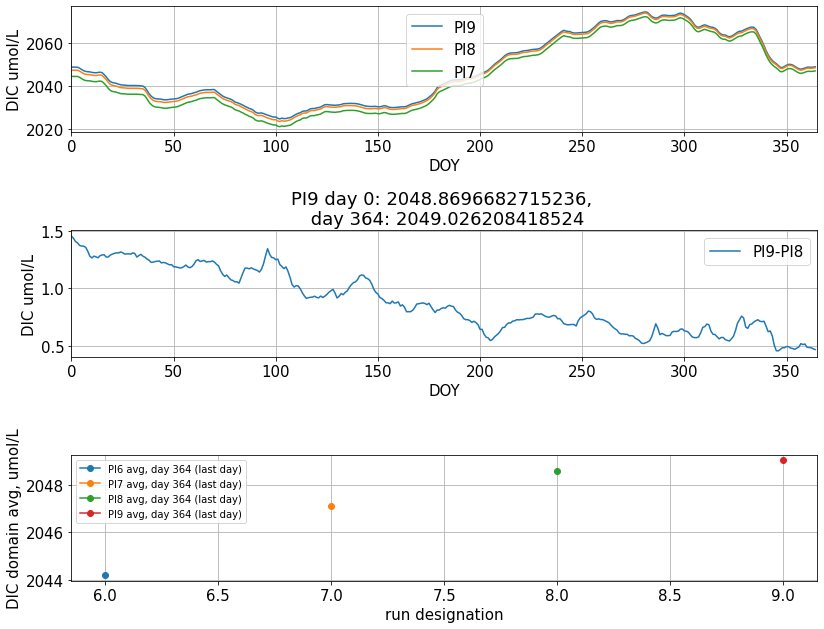

In [10]:
layersize = np.nansum(np.nansum(csize,axis=1),axis=1)
print(np.shape(layersize))
print(np.shape(PI9_var))
PI9_avg = np.zeros(365)
PI8_avg = np.zeros(365)
PI7_avg = np.zeros(365)
PI6_avg = np.zeros(365)

for i in range(0,365):
    PI8_avg[i] = np.nansum(PI8_var[:,i]*layersize)/np.nansum(layersize)
    #print(w)
    


for i in range(0,365):
    PI7_avg[i] = np.nansum(PI7_var[:,i]*layersize)/np.nansum(layersize)
    #print(w)
    
    
BR3_avg = np.zeros(365)

for i in range(0,365):
    BR3_avg[i] = np.nansum(BR3_var[:,i]*layersize)/np.nansum(layersize)
    #print(w)
    
for i in range(0,365):
    PI9_avg[i] = np.nansum(PI9_var[:,i]*layersize)/np.nansum(layersize)
    #print(w)

for i in range(0,365):
    PI6_avg[i] = np.nansum(PI6_var[:,i]*layersize)/np.nansum(layersize)
    #print(w)
    
# plt.plot(np.arange(0,365,1),PI9_avg, label = 'PI9')
# plt.plot(np.arange(0,365,1),PI8_avg, label = 'PI8')
# plt.plot(np.arange(0,365,1),PI7_avg, label = 'PI7')
# plt.xlabel('DOY')
# plt.ylabel('DIC umol/L')
# plt.grid()
fact = 0.9
plt.rcParams.update({'font.size': 15})
font = {'family' : 'normal',
'weight' : 'bold',
'size'   : 15}
fig, axs = plt.subplots(3,1, figsize=(13*fact, 10*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

axs[0].plot(np.arange(0,365,1),PI9_avg, label = 'PI9')
axs[0].plot(np.arange(0,365,1),PI8_avg, label = 'PI8')
axs[0].plot(np.arange(0,365,1),PI7_avg, label = 'PI7')
axs[0].legend(loc = 'best')

axs[0].set_xlabel('DOY')
axs[0].set_ylabel('DIC umol/L')
axs[0].grid()
axs[0].set_xlim([0,365])

axs[1].plot(np.arange(0,365,1),PI9_avg-PI8_avg, label = 'PI9-PI8')
# axs[1].plot(np.arange(0,365,1),PI8_avg, label = 'PI8')
# axs[1].plot(np.arange(0,365,1),PI7_avg, label = 'PI7')
# axs[1].legend(loc = 'best')
axs[1].set_title(f'PI9 day 0: {PI9_avg[0]}, \n day 364: {PI9_avg[364]}')
axs[1].legend(loc='best')
axs[1].set_xlabel('DOY')
axs[1].set_ylabel('DIC umol/L')
axs[1].grid()
axs[1].set_xlim([0,365])

axs[2].plot(6,PI6_avg[364], marker = 'o', label = 'PI6 avg, day 364 (last day)')
axs[2].plot(7,PI7_avg[364], marker = 'o', label = 'PI7 avg, day 364 (last day)')
axs[2].plot(8,PI8_avg[364], marker = 'o', label = 'PI8 avg, day 364 (last day)')
axs[2].plot(9,PI9_avg[364], marker = 'o', label = 'PI9 avg, day 364 (last day)')
axs[2].grid()
axs[2].set_xlabel('run designation'); axs[2].set_ylabel('DIC domain avg, umol/L')
axs[2].legend(fontsize = 10, loc = 2)
plt.tight_layout()

In [40]:
# tmesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

# end_of_days = np.zeros([4,40])
# end_of_days[0,:] = PI6_var[:,364]
# end_of_days[1,:] = PI7_var[:,364]
# end_of_days[2,:] = PI8_var[:,364]
# end_of_days[3,:] = PI9_var[:,364]

# end_of_days_mean = [PI6_avg[364],PI7_avg[364],PI8_avg[364],PI9_avg[364]]

# depths = tmesh['gdept_1d'][:]
# zdepths = depths[0]

# fact = 0.7
# fig, axs = plt.subplots(2,2, figsize=(13*fact, 10*fact), facecolor='w', edgecolor='k')
# axs = axs.ravel()

# tcm = cm.deep; shift = 2; seg = 45
# for i in range(0,40):
#     td = zdepths[i]
#     axs[0].plot(np.arange(6,10,1),end_of_days[:,i], color = tcm(1.*(i+shift)/seg))
#     if ((i == 0) | (i == 10) | (i==19) | (i == 24)\
#     | (i == 27) | (i == 35 ) ) :
#         axs[0].plot(np.arange(6,10,1),end_of_days[:,i],color = tcm(1.*(i+shift)/seg),\
#             label = str(int(td))+' m', linewidth = 2+1)
    
    
    
#     axs[1].plot(np.arange(6,10,1),end_of_days[:,i]-end_of_days[3,i], color = tcm(1.*(i+shift)/seg))
    
#     if ((i == 0) | (i == 10) | (i==19) | (i == 24)\
#     | (i == 27) | (i == 35 ) ) :
#         axs[1].plot(np.arange(6,10,1),end_of_days[:,i]-end_of_days[3,i],color = tcm(1.*(i+shift)/seg),\
#             label = str(int(td))+' m', linewidth = 2+1)
#         axs[1].legend(bbox_to_anchor = [1 ,1])

#         axs[1].plot(np.arange(6,10,1),end_of_days_mean-end_of_days_mean[3], color = 'orange', linewidth = 3)

# axs[1].axhline(y=0, color = 'r')


    
        
# for i in range(0,4):
#     axs[i].set_xticks([6,7,8,9])
#     axs[i].set_xlabel('run no (designation)')
    
# plt.tight_layout()

0
Y = -994.9792972499675 * e^(-1.0309776601552758 * x) + 1856.1942462117222
e-folding = 0.9699531218255396
1
Y = -1085.5844951030485 * e^(-0.9778720741911592 * x) + 1877.5342464413268
e-folding = 1.0226286509174973
2
Y = -399.8095706865579 * e^(-0.7777202804772833 * x) + 1897.9354874272963
e-folding = 1.285809339299092
3
Y = -141.1301048850891 * e^(-0.576813317106442 * x) + 1912.3093786648915
e-folding = 1.733663163354922
4
Y = -76.06584698612599 * e^(-0.4182392370187175 * x) + 1931.1363098514641
e-folding = 2.3909760526730466
5
Y = -57.458899771228914 * e^(-0.3388687414024772 * x) + 1942.490551726299
e-folding = 2.9509951135100176
6
Y = -71.29770552377906 * e^(-0.3738035928586119 * x) + 1950.9454005154703
e-folding = 2.675201681055649
7
Y = -130.37824963727425 * e^(-0.49254134682835127 * x) + 1956.5851544658365
e-folding = 2.0302864042569326
10
Y = -532.4282758028347 * e^(-0.7558855474450481 * x) + 1970.099949390148
e-folding = 1.3229516073962224
11
Y = -655.6476960416906 * e^(-0.7976

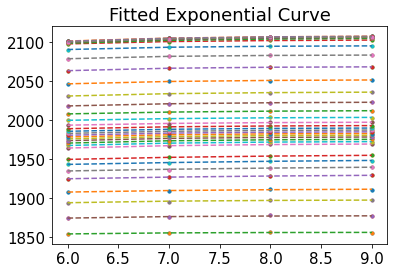

In [26]:
#https://swharden.com/blog/2020-09-24-python-exponential-fit/

import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

efold = np.zeros([40])
bimit = np.zeros([40])

for i in range(0,38):
    if i not in [8,9]:
        xs = np.arange(6,10,1)
        ys = end_of_days[:,i]

        plt.plot(xs, ys, '.')
        plt.title("Original Data")


        # perform the fit
        p0 = (2000, .1, 50) # start with values near those we expect
        print(i)
        params, cv = scipy.optimize.curve_fit(monoExp, xs, ys, p0)
        m, t, b = params
        sampleRate = 20_000 # Hz
        tauSec = (1 / t) / sampleRate

        # plot the results
        plt.plot(xs, ys, '.', label="data")
        plt.plot(xs, monoExp(xs, m, t, b), '--', label="fitted")
        plt.title("Fitted Exponential Curve")

        # inspect the parameters
        print(f"Y = {m} * e^(-{t} * x) + {b}")
        print(f'e-folding = {1/t}')
        efold[i] = 1/t
        bimit[i] = b

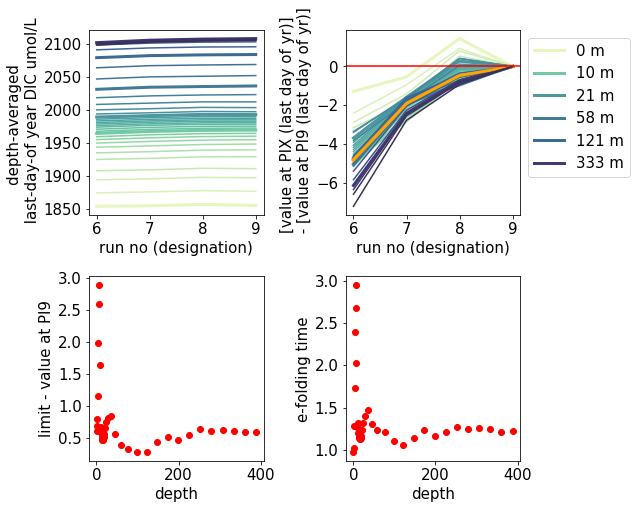

In [41]:
tmesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

end_of_days = np.zeros([4,40])
end_of_days[0,:] = PI6_var[:,364]
end_of_days[1,:] = PI7_var[:,364]
end_of_days[2,:] = PI8_var[:,364]
end_of_days[3,:] = PI9_var[:,364]

end_of_days_mean = [PI6_avg[364],PI7_avg[364],PI8_avg[364],PI9_avg[364]]

depths = tmesh['gdept_1d'][:]
zdepths = depths[0]

fact = 0.7
fig, axs = plt.subplots(2,2, figsize=(13*fact, 10*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

tcm = cm.deep; shift = 2; seg = 45
for i in range(0,40):
    td = zdepths[i]
    axs[0].plot(np.arange(6,10,1),end_of_days[:,i], color = tcm(1.*(i+shift)/seg))
    if ((i == 0) | (i == 10) | (i==19) | (i == 24)\
    | (i == 27) | (i == 35 ) ) :
        axs[0].plot(np.arange(6,10,1),end_of_days[:,i],color = tcm(1.*(i+shift)/seg),\
            label = str(int(td))+' m', linewidth = 2+1)
axs[0].set_ylabel('depth-averaged \n last-day-of year DIC umol/L')    

###1 
for i in range(0,40):
    td = zdepths[i]
    axs[1].plot(np.arange(6,10,1),end_of_days[:,i]-end_of_days[3,i], color = tcm(1.*(i+shift)/seg))
    
    if ((i == 0) | (i == 10) | (i==19) | (i == 24)\
    | (i == 27) | (i == 35 ) ) :
        axs[1].plot(np.arange(6,10,1),end_of_days[:,i]-end_of_days[3,i],color = tcm(1.*(i+shift)/seg),\
            label = str(int(td))+' m', linewidth = 2+1)
        axs[1].legend(bbox_to_anchor = [1 ,1])

        axs[1].plot(np.arange(6,10,1),end_of_days_mean-end_of_days_mean[3], color = 'orange', linewidth = 3)

axs[1].axhline(y=0, color = 'r')
axs[1].set_ylabel('[value at PIX (last day of yr)] \n - [value at PI9 (last day of yr)]')


#### 2
bimit[bimit == 0] = np.nan
for i in range(0,40):
    
    td = zdepths[i]
    axs[2].plot(td,(bimit[i]-end_of_days[3,i]),'ro')
    axs[2].set_xlabel('depth');axs[2].set_ylabel('limit - value at PI9');
    
efold[efold == 0] = np.nan
for i in range(0,40):
    
    td = zdepths[i]
    axs[3].plot(td,(efold[i]),'ro')
    axs[3].set_xlabel('depth');axs[3].set_ylabel('e-folding time');
    
for i in range(0,2):
    axs[i].set_xticks([6,7,8,9])
    axs[i].set_xlabel('run no (designation)')
    
plt.tight_layout()